In [1]:
from array import array
import itertools
import time
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from matplotlib.ticker import NullFormatter

#This line is important. On this server I don't know if we have the ability to output plots. This is a solution.

%matplotlib inline

#Importing root_pandas and root_numpy.

import sys
sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import root_pandas as rpd
import ROOT
from root_pandas import read_root

Welcome to ROOTaaS 6.06/06


In [2]:
def getWeights(filename,dataframe):
    
    if('Skimmed_17g6a1_pthat1' in filename):
        dataframe.eval('weights = 1.60*10**(-11)',inplace=True)
    elif('Skimmed_17g6a1_pthat2' in filename):
        dataframe.eval('weights = 2.72*10**(-12)',inplace=True)
    elif('Skimmed_17g6a1_pthat3' in filename):
        dataframe.eval('weights = 3.69*10**(-13)',inplace=True)
    elif('Skimmed_17g6a1_pthat4' in filename):
        dataframe.eval('weights = 6.14*10**(-14)',inplace=True)
    elif('Skimmed_17g6a1_pthat5' in filename):
        dataframe.eval('weights = 1.27*10**(-14)',inplace=True)
    
    elif('Skimmed_17g6a3_pthat1' in filename):
        dataframe.eval('weights = 4.47*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat2' in filename):
        dataframe.eval('weights = 9.83*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat3' in filename):
        dataframe.eval('weights = 1.04*10**(-10)',inplace=True)
    elif('Skimmed_17g6a3_pthat4' in filename):
        dataframe.eval('weights = 1.01*10**(-10)',inplace=True)
    elif('Skimmed_17g6a3_pthat5' in filename):
        dataframe.eval('weights = 6.93*10**(-11)',inplace=True)
    
    else:
        dataframe.eval('weights = eg_cross_section/eg_ntrial',inplace=True)
        
    return dataframe

In [3]:
def getCluster04(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('cluster_pt')
    arrayColumns.append('cluster_eta')
    arrayColumns.append('cluster_ncell')
    arrayColumns.append('cluster_e_cross')
    arrayColumns.append('cluster_e')
    arrayColumns.append('cluster_e_max')
    arrayColumns.append('cluster_tof')
    arrayColumns.append('cluster_nlocal_maxima')
    arrayColumns.append('cluster_distance_to_bad_channel')
    arrayColumns.append('cluster_iso_its_04')
    arrayColumns.append('cluster_iso_its_04_ue')
    arrayColumns.append('cluster_iso_04_truth')
    arrayColumns.append('cluster_NN1')
    arrayColumns.append('cluster_Lambda')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile, columns=columns, flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename, end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [4]:
def getCluster03(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('cluster_pt')
    arrayColumns.append('cluster_eta')
    arrayColumns.append('cluster_ncell')
    arrayColumns.append('cluster_e_cross')
    arrayColumns.append('cluster_e')
    arrayColumns.append('cluster_e_max')
    arrayColumns.append('cluster_tof')
    arrayColumns.append('cluster_nlocal_maxima')
    arrayColumns.append('cluster_distance_to_bad_channel')
    arrayColumns.append('cluster_iso_its_03')
    arrayColumns.append('cluster_iso_its_03_ue')
    arrayColumns.append('cluster_iso_03_truth')
    arrayColumns.append('cluster_NN1')
    arrayColumns.append('cluster_Lambda')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile, columns=columns, flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename, end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [5]:
mc_17g6a1_files = ['Skimmed_17g6a1_pthat1_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat2_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat3_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat4_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat5_ptmin12.0_Nevent_300000.root']
mc_17g6a1_04 = getCluster04(mc_17g6a1_files)
mc_17g6a1_03 = getCluster03(mc_17g6a1_files)

mc_17g6a3_files = ['Skimmed_17g6a3_pthat1_ptmin12.0_Nevent_150000.root','Skimmed_17g6a3_pthat2_ptmin12.0_Nevent_150000.root','Skimmed_17g6a3_pthat3_ptmin12.0_Nevent_150000.root','Skimmed_17g6a3_pthat4_ptmin12.0_Nevent_150000.root']
mc_17g6a3_04 = getCluster04(mc_17g6a3_files)
mc_17g6a3_03 = getCluster03(mc_17g6a3_files)

Processed Skimmed_17g6a1_pthat1_ptmin12.0_Nevent_300000.root in 1.93987298012 seconds
Processed Skimmed_17g6a1_pthat2_ptmin12.0_Nevent_300000.root in 6.79905080795 seconds
Processed Skimmed_17g6a1_pthat3_ptmin12.0_Nevent_300000.root in 14.7110641003 seconds
Processed Skimmed_17g6a1_pthat4_ptmin12.0_Nevent_300000.root in 10.2802689075 seconds
Processed Skimmed_17g6a1_pthat5_ptmin12.0_Nevent_300000.root in 2.11481308937 seconds
Processed Skimmed_17g6a1_pthat1_ptmin12.0_Nevent_300000.root in 1.47221708298 seconds
Processed Skimmed_17g6a1_pthat2_ptmin12.0_Nevent_300000.root in 6.29398488998 seconds
Processed Skimmed_17g6a1_pthat3_ptmin12.0_Nevent_300000.root in 10.3247630596 seconds
Processed Skimmed_17g6a1_pthat4_ptmin12.0_Nevent_300000.root in 8.18441390991 seconds
Processed Skimmed_17g6a1_pthat5_ptmin12.0_Nevent_300000.root in 1.91917395592 seconds
Processed Skimmed_17g6a3_pthat1_ptmin12.0_Nevent_150000.root in 0.891439914703 seconds
Processed Skimmed_17g6a3_pthat2_ptmin12.0_Nevent_1500

In [6]:
def applyCut(inputDataframe,cut,text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [7]:
def applyCuts04(fullDataframe,name='default'):  
    
    fullDataframe.eval('cluster_ecross_over_e = cluster_e_cross/cluster_e',inplace=True)
    fullDataframe.eval('cluster_emax_over_e = cluster_e_max/cluster_e',inplace=True)
    fullDataframe.eval('cluster_iso_its_04_sub = cluster_iso_its_04 + cluster_iso_its_04_ue - ue_estimate_its_const*0.4*0.4*3.1416',inplace=True)
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe,'cluster_pt > 12.0 and cluster_pt < 30','12 GeV < pt < 30 GeV:')
    dataframe = applyCut(dataframe, 'abs(cluster_eta) < 0.67','|eta| < 0.67:')
    dataframe = applyCut(dataframe, 'cluster_ecross_over_e > 0.03', 'ecross/e > 0.03:')
    dataframe = applyCut(dataframe, 'cluster_ncell > 2', 'number of cells > 2')
    dataframe = applyCut(dataframe, 'abs(cluster_tof) < 20', '|tof| < 20:')
    dataframe = applyCut(dataframe, 'cluster_nlocal_maxima < 3', 'maxima < 3:')


    return dataframe

In [8]:
def applyCuts03(fullDataframe,name='default'):  
    
    fullDataframe.eval('cluster_ecross_over_e = cluster_e_cross/cluster_e',inplace=True)
    fullDataframe.eval('cluster_emax_over_e = cluster_e_max/cluster_e',inplace=True)
    fullDataframe.eval('cluster_iso_its_03_sub = cluster_iso_its_03 + cluster_iso_its_03_ue - ue_estimate_its_const*0.3*0.3*3.1416',inplace=True)
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe,'cluster_pt > 12.0 and cluster_pt < 30','12 GeV < pt < 30 GeV:')
    dataframe = applyCut(dataframe, 'abs(cluster_eta) < 0.67','|eta| < 0.67:')
    dataframe = applyCut(dataframe, 'cluster_ecross_over_e > 0.03', 'ecross/e > 0.03:')
    dataframe = applyCut(dataframe, 'cluster_ncell > 2', 'number of cells > 2')
    dataframe = applyCut(dataframe, 'abs(cluster_tof) < 20', '|tof| < 20:')
    dataframe = applyCut(dataframe, 'cluster_nlocal_maxima < 3', 'maxima < 3:')
 
    return dataframe

In [9]:
print 'Skimmed_17g6a1.root'
mcSignal_17g6a1_Hists_04 = applyCuts04(mc_17g6a1_04)
print '\n'
mcSignal_17g6a1_Hists_03 = applyCuts03(mc_17g6a1_03)
print '\n'

print 'Skimmed_17g6a3.root'
mcSignal_17g6a3_Hists_04 = applyCuts04(mc_17g6a3_04)
print '\n'
mcSignal_17g6a3_Hists_03 = applyCuts03(mc_17g6a3_03)
print '\n'

Skimmed_17g6a1.root
12 GeV < pt < 30 GeV: 341608  fraction kept: 28.6
|eta| < 0.67: 341483  fraction kept: 100.0
ecross/e > 0.03: 339447  fraction kept: 99.4
number of cells > 2 339210  fraction kept: 99.9
|tof| < 20: 339210  fraction kept: 100.0
maxima < 3: 331374  fraction kept: 97.7


12 GeV < pt < 30 GeV: 341608  fraction kept: 28.6
|eta| < 0.67: 341483  fraction kept: 100.0
ecross/e > 0.03: 339447  fraction kept: 99.4
number of cells > 2 339210  fraction kept: 99.9
|tof| < 20: 339210  fraction kept: 100.0
maxima < 3: 331374  fraction kept: 97.7


Skimmed_17g6a3.root
12 GeV < pt < 30 GeV: 45429  fraction kept: 31.0
|eta| < 0.67: 45423  fraction kept: 100.0
ecross/e > 0.03: 45242  fraction kept: 99.6
number of cells > 2 45232  fraction kept: 100.0
|tof| < 20: 45232  fraction kept: 100.0
maxima < 3: 40013  fraction kept: 88.5


12 GeV < pt < 30 GeV: 45429  fraction kept: 31.0
|eta| < 0.67: 45423  fraction kept: 100.0
ecross/e > 0.03: 45242  fraction kept: 99.6
number of cells > 2 452

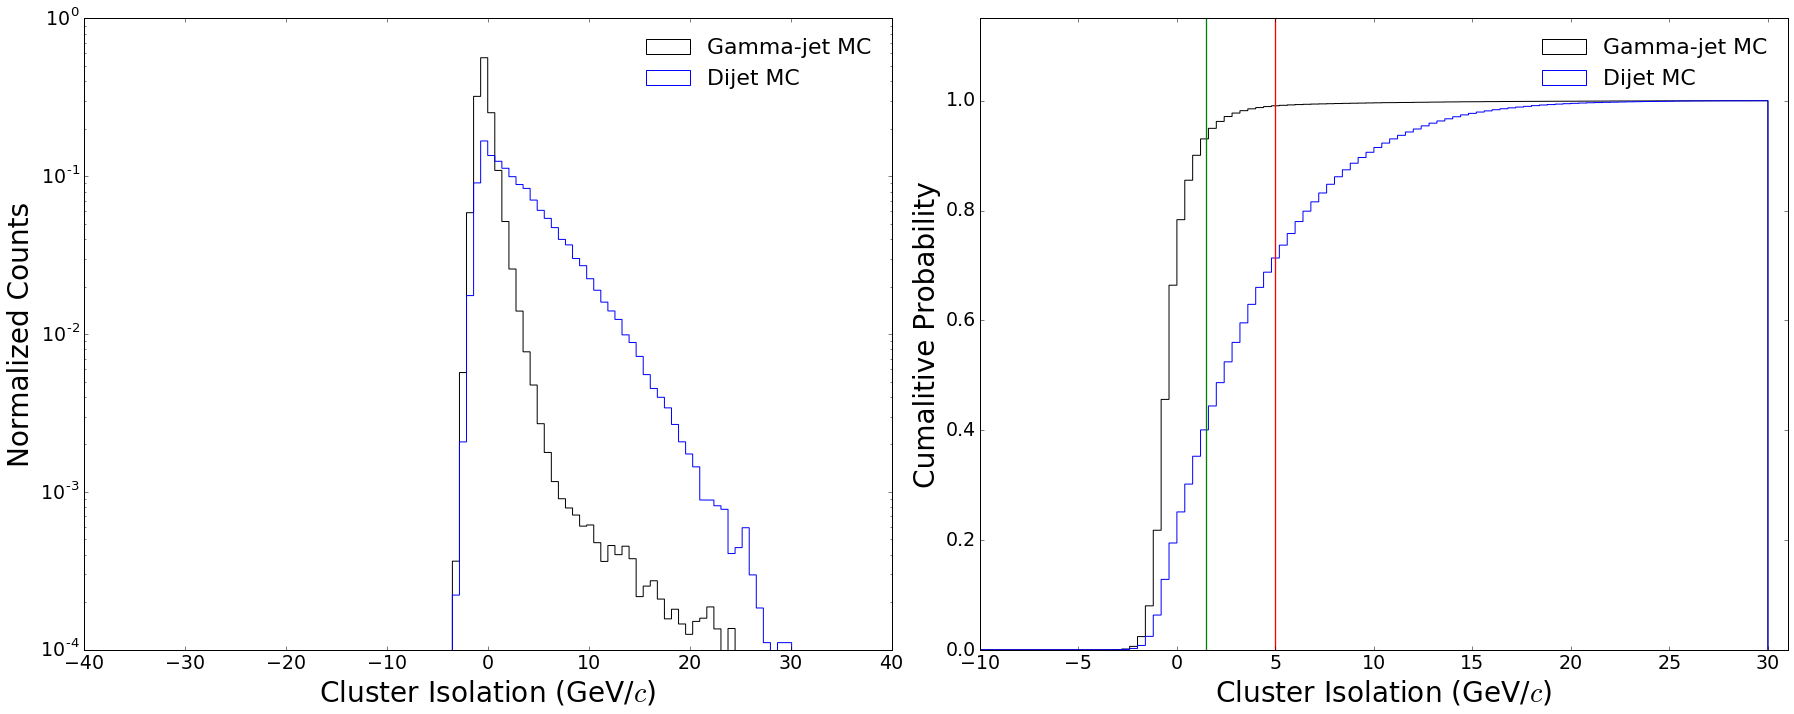

In [10]:
fig = plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.hist(mcSignal_17g6a1_Hists_04["cluster_iso_its_04_sub"],bins=100,color='black',range=(-35,35),weights=mcSignal_17g6a1_Hists_04['weights'],label = 'Gamma-jet MC',histtype='step',normed=1)
plt.hist(mcSignal_17g6a3_Hists_04["cluster_iso_its_04_sub"],bins=100,color='b',range=(-35,35),weights=mcSignal_17g6a3_Hists_04['weights'],label = 'Dijet MC',histtype='step',normed=1)
plt.xlabel('Cluster Isolation (GeV/$c$)', fontsize = 28)
plt.xticks(fontsize=19)
plt.ylabel('Normalized Counts', fontsize = 28)
plt.yticks(fontsize=19)
plt.ylim(0.0001,1)
plt.yscale('log')
plt.legend(prop={'size': 22},frameon=False)

plt.subplot(1,2,2)
plt.hist(mcSignal_17g6a1_Hists_04["cluster_iso_its_04_sub"],bins=100,color='black',range=(-10,30),weights=mcSignal_17g6a1_Hists_04['weights'],label = 'Gamma-jet MC',cumulative=True,histtype='step',normed=1)
plt.hist(mcSignal_17g6a3_Hists_04["cluster_iso_its_04_sub"],bins=100,color='b',range=(-10,30),weights=mcSignal_17g6a3_Hists_04['weights'],label = 'Dijet MC',cumulative=True,histtype='step',normed=1)
plt.xlabel('Cluster Isolation (GeV/$c$)', fontsize = 28)
plt.xticks(fontsize=19)
plt.xlim(-10,31)
plt.ylabel('Cumalitive Probability', fontsize = 28)
plt.yticks(fontsize=19)
plt.ylim(0,1.15)
plt.axvline(x=1.5,color='green',linestyle='-',linewidth=1.3)
plt.axvline(x=5,color='r',linestyle='-',linewidth=1.3)
# plt.text(-5,1.1,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=20)
plt.legend(loc='upper right',prop={'size': 22},frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('Isolation_MC_pPb.pdf')

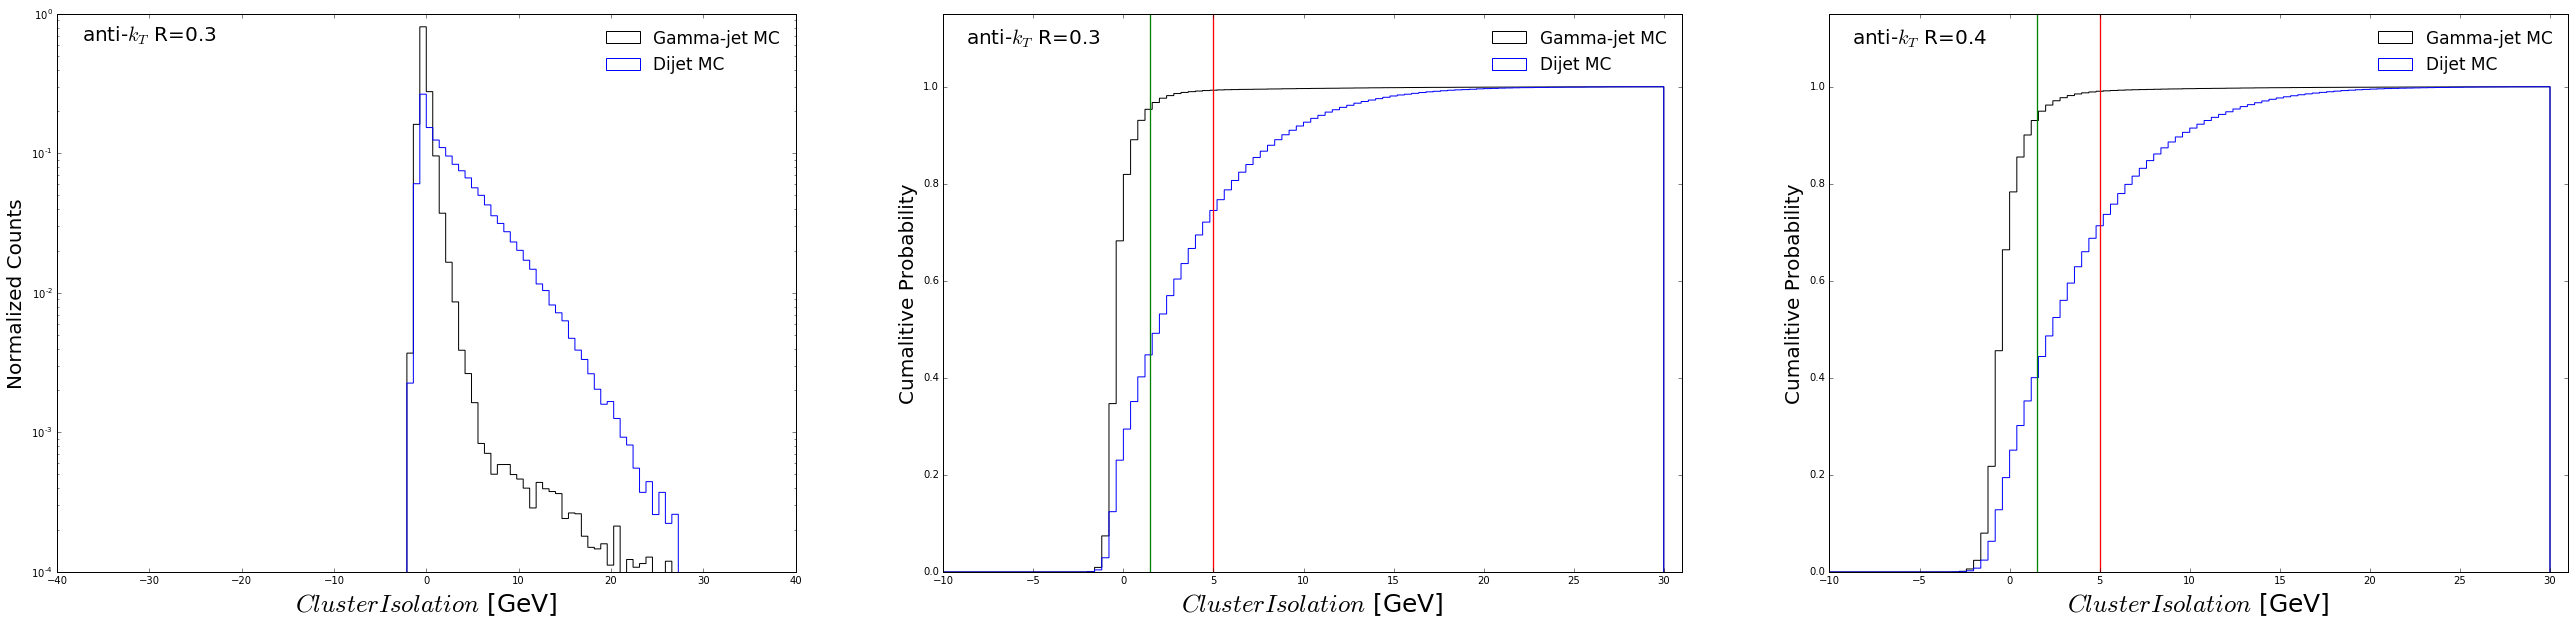

In [11]:
fig = plt.figure(figsize=(45,10))

plt.subplot(1,3,1)
plt.hist(mcSignal_17g6a1_Hists_03["cluster_iso_its_03_sub"],bins=100,color='black',range=(-35,35),weights=mcSignal_17g6a1_Hists_03['weights'],label = 'Gamma-jet MC',histtype='step',normed=1)
plt.hist(mcSignal_17g6a3_Hists_03["cluster_iso_its_03_sub"],bins=100,color='b',range=(-35,35),weights=mcSignal_17g6a3_Hists_03['weights'],label = 'Dijet MC',histtype='step',normed=1)
plt.xlabel(r'$Cluster Isolation$ [GeV]', fontsize = 25)
plt.ylabel('Normalized Counts', fontsize = 20)
plt.ylim(0.0001,1)
plt.yscale('log')
plt.text(-30,0.7,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=20)
plt.legend(prop={'size': 17},frameon=False)

plt.subplot(1,3,2)
plt.hist(mcSignal_17g6a1_Hists_03["cluster_iso_its_03_sub"],bins=100,color='black',range=(-10,30),weights=mcSignal_17g6a1_Hists_03['weights'],label = 'Gamma-jet MC',cumulative=True,histtype='step',normed=1)
plt.hist(mcSignal_17g6a3_Hists_03["cluster_iso_its_03_sub"],bins=100,color='b',range=(-10,30),weights=mcSignal_17g6a3_Hists_03['weights'],label = 'Dijet MC',cumulative=True,histtype='step',normed=1)
plt.xlabel(r'$Cluster Isolation$ [GeV]', fontsize = 25)
plt.ylabel('Cumalitive Probability', fontsize = 20)
plt.xlim(-10,31)
plt.ylim(0,1.15)
plt.axvline(x=1.5,color='green',linestyle='-',linewidth=1.3)
plt.axvline(x=5,color='r',linestyle='-',linewidth=1.3)
plt.text(-5,1.1,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=20)
plt.legend(prop={'size': 17},frameon=False)

plt.subplot(1,3,3)
plt.hist(mcSignal_17g6a1_Hists_04["cluster_iso_its_04_sub"],bins=100,color='black',range=(-10,30),weights=mcSignal_17g6a1_Hists_04['weights'],label = 'Gamma-jet MC',cumulative=True,histtype='step',normed=1)
plt.hist(mcSignal_17g6a3_Hists_04["cluster_iso_its_04_sub"],bins=100,color='b',range=(-10,30),weights=mcSignal_17g6a3_Hists_04['weights'],label = 'Dijet MC',cumulative=True,histtype='step',normed=1)
plt.xlabel(r'$Cluster Isolation$ [GeV]', fontsize = 25)
plt.xlim(-10,31)
plt.ylabel('Cumalitive Probability', fontsize = 20)
plt.ylim(0,1.15)
plt.axvline(x=1.5,color='green',linestyle='-',linewidth=1.3)
plt.axvline(x=5,color='r',linestyle='-',linewidth=1.3)
plt.text(-5,1.1,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=20)
plt.legend(prop={'size': 17},frameon=False)

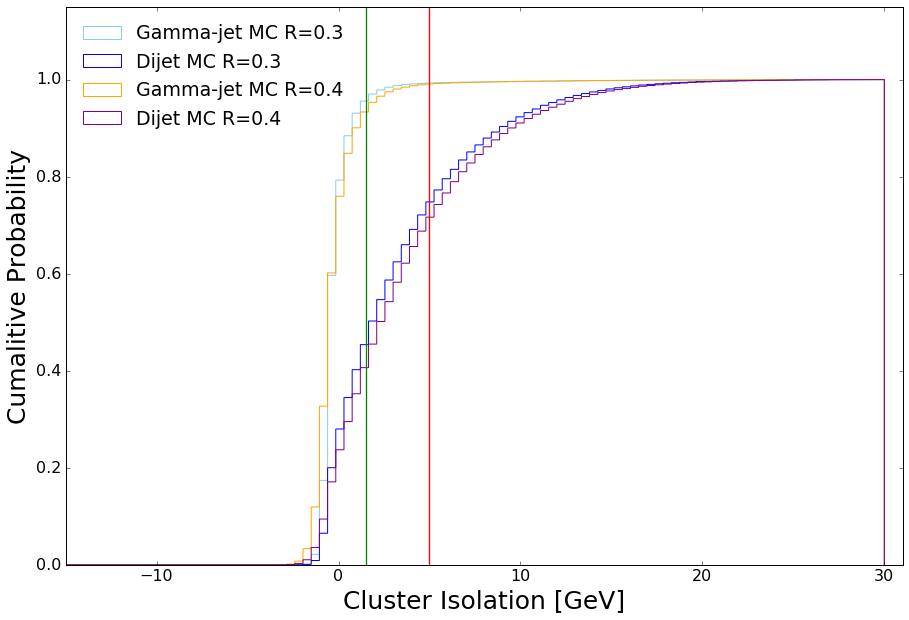

In [12]:
fig = plt.figure(figsize=(15,10))

plt.hist(mcSignal_17g6a1_Hists_03["cluster_iso_its_03_sub"],bins=100,color='skyblue',range=(-15,30),weights=mcSignal_17g6a1_Hists_03['weights'],label = 'Gamma-jet MC R=0.3',cumulative=True,histtype='step',normed=1);
plt.hist(mcSignal_17g6a3_Hists_03["cluster_iso_its_03_sub"],bins=100,color='b',range=(-15,30),weights=mcSignal_17g6a3_Hists_03['weights'],label = 'Dijet MC R=0.3',cumulative=True,histtype='step',normed=1);
plt.hist(mcSignal_17g6a1_Hists_04["cluster_iso_its_04_sub"],bins=100,color='orange',range=(-15,30),weights=mcSignal_17g6a1_Hists_04['weights'],label = 'Gamma-jet MC R=0.4',cumulative=True,histtype='step',normed=1);
plt.hist(mcSignal_17g6a3_Hists_04["cluster_iso_its_04_sub"],bins=100,color='purple',range=(-15,30),weights=mcSignal_17g6a3_Hists_04['weights'],label = 'Dijet MC R=0.4',cumulative=True,histtype='step',normed=1);
plt.xlabel('Cluster Isolation [GeV]', fontsize = 25)
plt.xticks(fontsize=16)
plt.xlim(-15,31)
plt.ylabel('Cumalitive Probability', fontsize = 25)
plt.yticks(fontsize=16)
plt.ylim(0,1.15)
plt.axvline(x=1.5,color='green',linestyle='-',linewidth=1.3)
plt.axvline(x=5,color='r',linestyle='-',linewidth=1.3)
plt.legend(loc='upper left',prop={'size': 19},frameon=False)